# 1 | Preparing the data frame.

## 1.1 | Hate Speech Filipino Dataset (source 1).

### Load the dataset.

In [2]:
# Load the datasets from the local csv files.
# Datasets are from Hugging Face (ref: https://huggingface.co/datasets/hate_speech_filipino)

import pandas as pd

local_sub_path = 'datasets/Hate Speech Filipino/'

hate_speech_fil_train_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_test_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_validate_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_validate.csv')

# Combine all the datasets into a single data frame.
hate_speech_fil_df = pd.concat([hate_speech_fil_test_df, hate_speech_fil_train_df, hate_speech_fil_validate_df])

# Reset the index of hate_speech_fil_df.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

### Inspect the dataset.

In [3]:
hate_speech_fil_train_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [4]:
hate_speech_fil_test_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [5]:
hate_speech_fil_validate_df

,text,label
0,Escudero denies betraying Poe after meeting wi...,0
1,Hndi ko makita yung sa one more chance saka ka...,1
2,Mar Roxas is now addressing the crowd gathered...,0
3,@ImYourBaeMax perfect! Para makaharap ni Duter...,0
4,#OnlyBinayPriority4Ps Wag nating hayaan na mal...,0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [6]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
24227,Walang katumbas na halaga ng pera ang BOTO at ...,0
24228,Mar Roxas says presidential race is now only b...,0
24229,Ms Miriam to withdraw presidency to give away ...,0
24230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [7]:
# Check the basic information of the data frame.
hate_speech_fil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24232 entries, 0 to 24231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24232 non-null  object
 1   label   24232 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 378.8+ KB


### Clean the dataset.

In [8]:
# Check for null values.
hate_speech_fil_df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
# Check for duplicates.
hate_speech_fil_df.duplicated().sum()

10356

In [10]:
# Show the duplicates.
hate_speech_fil_df[hate_speech_fil_df.duplicated()]


,text,label
452,#NogNogHambog,1
481,#OnlyBinayInMakatiSanKaPa,0
543,#OnlyBinayInMakatiSanKaPa,0
576,#OnlyBinayInMakatiSanKaPa,0
598,#OnlyBinayUNAsaIlocos,0
...,...,...
24013,#OnlyBinayUNAsaIlocos,0
24029,#onlybinay,0
24042,#PHvote,0
24158,#PiliPinasDebates2016,1


In [11]:
# Drop the duplicates.
hate_speech_fil_df.drop_duplicates(inplace=True)

# Reset the index.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

In [12]:
# Verify that there are no duplicates.
hate_speech_fil_df.duplicated().sum()

0

In [13]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
13871,Walang katumbas na halaga ng pera ang BOTO at ...,0
13872,Mar Roxas says presidential race is now only b...,0
13873,Ms Miriam to withdraw presidency to give away ...,0
13874,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


## 1.2 | Toxic Tweets Dataset (source 2).

### Load the dataset.

In [14]:
# Load the dataset from the local csv file.
# Dataset is from Kaggle (ref: https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset)

local_sub_path = 'datasets/Toxic Tweets/'

raw_toxic_tweets_df = pd.read_csv(local_sub_path + 'FinalBalancedDataset.csv')

### Inspect the dataset.

In [15]:
raw_toxic_tweets_df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [16]:
# Check the basic information of the data frame.
raw_toxic_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


### Clean the dataset.

In [17]:
# Check for null values.
raw_toxic_tweets_df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [18]:
# Check for duplicates.
raw_toxic_tweets_df.duplicated().sum()

0

### Restructure the data frame.

In [19]:
# The data frame should have only a text and label features.

toxic_tweets_df = raw_toxic_tweets_df.copy()
toxic_tweets_df.rename(columns={'tweet': 'text', 'Toxicity': 'label'}, inplace=True)
toxic_tweets_df = toxic_tweets_df[['text', 'label']]

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
56741,"you've gone and broke the wrong heart baby, an...",1
56742,young buck wanna eat!!.. dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,1


### Clean the dataset again.

In [20]:
# Check for duplicates.
toxic_tweets_df.duplicated().sum()

2432

In [21]:
# Show the duplicates.
toxic_tweets_df[toxic_tweets_df.duplicated()]

,text,label
46,#model i love u take with u all the time in ...,0
96,#model i love u take with u all the time in ...,0
117,#model i love u take with u all the time in ...,0
162,#model i love u take with u all the time in ...,0
218,#model i love u take with u all the time in ...,0
...,...,...
31886,100 amazing health benefits of cucumbers! #...,0
31904,#model i love u take with u all the time in ...,0
31930,@user #feminismiscancer #feminismisterrorism #...,1
31951,i've just posted a new blog: #secondlife #lone...,0


In [22]:
# Drop the duplicates.
toxic_tweets_df.drop_duplicates(inplace=True)

# Reset the index.
toxic_tweets_df.reset_index(drop=True, inplace=True)

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
54308,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
54309,"you've gone and broke the wrong heart baby, an...",1
54310,young buck wanna eat!!.. dat nigguh like I ain...,1
54311,youu got wild bitches tellin you lies,1


In [23]:
# Verify that there are no duplicates.
toxic_tweets_df.duplicated().sum()

0

## 1.3 | Hate Speech and Offensive Language Dataset (source 3)

### Load the dataset.

In [24]:
# Load the dataset from the local csv file.
# Dataset is from Kaggle (ref: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset)

local_sub_path = 'datasets/Hate Speech and Offensive Language/'

raw_hs_and_offensive_lang_df = pd.read_csv(local_sub_path + 'labeled_data.csv')

### Inspect the dataset.

In [25]:
raw_hs_and_offensive_lang_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [26]:
# Check the basic information of the data frame.
raw_hs_and_offensive_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


### Clean the dataset.

In [27]:
# Check for null values.
raw_hs_and_offensive_lang_df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [28]:
# Check for duplicates.
raw_hs_and_offensive_lang_df.duplicated().sum()

0

### Restructure the data frame.

In [29]:
# The data frame should have only a text and label features.

hs_and_offensive_lang_df = raw_hs_and_offensive_lang_df.copy()
hs_and_offensive_lang_df = hs_and_offensive_lang_df[['tweet', 'class']]
hs_and_offensive_lang_df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)

# The original labels are 0, 1, and 2. They each means 'hate speech', 'offensive language', and 'neither' respectively.
# The original labels 0 and 1 will be mapped to 1 (means toxic) and 2 will be mapped to 0 (means non-toxic)
mapping = {0: 1, 1: 1, 2: 0}
hs_and_offensive_lang_df['label'] = hs_and_offensive_lang_df['label'].map(mapping)

hs_and_offensive_lang_df


,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


### Clean the dataset again.

In [30]:
# Check for duplicates.
hs_and_offensive_lang_df.duplicated().sum()

0

## 1.4 | Combine the different data frames.

In [31]:
# Make a single data frame for all the datasets.
df = pd.concat([hate_speech_fil_df, toxic_tweets_df, hs_and_offensive_lang_df], ignore_index=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
92967,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
92968,"you've gone and broke the wrong heart baby, an...",0
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


### Clean the data.

After countless experiments, removing the substrings that starts with @, http, and, https reduces the accuracy rate on sufficiently large data sets. For now, we will comment this subsequent code out.

In [32]:
# # Remove the substrings that starts with @, http, and https.
# # The are irrelevant to the classification.

# import re

# for index, row in df.iterrows():
#     df.loc[index, 'text'] = re.sub(r'@\S+', '', df.loc[index, 'text'])
#     df.loc[index, 'text'] = re.sub(r'http\S+', '', df.loc[index, 'text'])
#     df.loc[index, 'text'] = re.sub(r'https\S+', '', df.loc[index, 'text'])

# df

In [33]:
# Check for duplicates.
df.duplicated().sum()

23492

In [34]:
# Show the duplicates.
df[df.duplicated()]

,text,label
68189,!!! RT @mayasolovely: As a woman you shouldn't...,0
68190,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
68191,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
68192,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
68193,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
92966,you're such a retard i hope you get type 2 dia...,1
92967,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


In [35]:
# Drop the duplicates.
df.drop_duplicates(inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
69475,when baylor wins im talking so much trash,0
69476,who's downie like a brownie 4 brunch? Need mim...,0
69477,yea so about @N_tel 's new friend.. all my fri...,0
69478,"you know what they say, the early bird gets th...",0


In [36]:
# Verify that there are no duplicates.
df.duplicated().sum()

0

In [37]:
# Check for texts that only contain number strings.
df[df['text'].str.isnumeric()]

,text,label


In [38]:
# Check for empty strings.
df[df['text'] == '']

,text,label


In [39]:
# Remove the rows with empty strings.
df.drop(df[df['text'] == ''].index, inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
69475,when baylor wins im talking so much trash,0
69476,who's downie like a brownie 4 brunch? Need mim...,0
69477,yea so about @N_tel 's new friend.. all my fri...,0
69478,"you know what they say, the early bird gets th...",0


In [40]:
# Verify that there are no empty strings.
df[df['text'] == '']

,text,label


## Creating a Train and Test sets

In [41]:
X = df['text']
y = df['label']

print(X.shape)
print(y.shape)

(69480,)
(69480,)


In [42]:
# Split X and y into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52110,)
(17370,)
(52110,)
(17370,)


## Vectorizing the dataset

In [43]:
# Instantiate the CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()

In [44]:
# Learn the training data vocabulary, then use it to create a document-term matrix.

cvect.fit(X_train)

CountVectorizer()

In [45]:
# Examine the fitted vocabulary.

feature_names = cvect.get_feature_names_out()
print(feature_names)
print('len:', len(feature_names))
pd.DataFrame(feature_names)


['00' '000' '0000000000000' ... 'ð¾ñ' 'ó¾' 'ø¹ù']
len: 69692


,0
0,00
1,000
2,0000000000000
3,000001
4,002
...,...
69687,ð¾ð½ð
69688,ð¾ð½ðµð
69689,ð¾ñ
69690,ó¾


In [46]:
# Transform the training data into a document-term matrix.

# X_train_dtm = vect.transform(X_train)
X_train_dtm = cvect.fit_transform(X_train)

In [47]:
# Examine the document-term matrix.

X_train_dtm

<52110x69692 sparse matrix of type '<class 'numpy.int64'>'
	with 653595 stored elements in Compressed Sparse Row format>

In [48]:
# Transform the testing data (using fitted vocabulary) into a document-term matrix.

X_test_dtm = cvect.transform(X_test)
X_test_dtm

<17370x69692 sparse matrix of type '<class 'numpy.int64'>'
	with 202486 stored elements in Compressed Sparse Row format>

# 2 | Building and Evaluating the model

## Building the model.

In [49]:
# Import and instantiate a Multinomial Naive Bayes model.

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [50]:
# Train the model using X_train_dtm and the fit() method.

mnb.fit(X_train_dtm, y_train)

MultinomialNB()

## Evaluating the model.

In [51]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.

y_pred_class = mnb.predict(X_test_dtm)

In [52]:
# Calculate the accuracy of the predictions.

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.8637881404720783

array([[8391, 1409],
       [ 957, 6613]], dtype=int64)

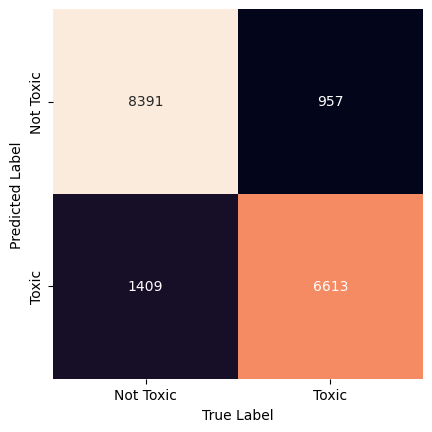

In [53]:
# Print the confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [54]:
# Print the classification report.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9800
           1       0.82      0.87      0.85      7570

    accuracy                           0.86     17370
   macro avg       0.86      0.86      0.86     17370
weighted avg       0.87      0.86      0.86     17370



In [55]:
# Show the predicted probabilities for the X_test_dtm.

y_pred_prob = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([9.99969555e-01, 9.99999783e-01, 9.99999990e-01, ...,
       8.30752541e-01, 3.98301173e-07, 4.51200757e-04])

In [56]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.

test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob': y_pred_prob})
test_results_df


,text,actual,predicted,prob
5488,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,9.999696e-01
50853,A lot of you niggas turned these bitches into ...,1,1,9.999998e-01
61636,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,1.000000e+00
35506,our playground for the morning. big bear tri ...,0,0,4.488642e-03
2918,"""@ellisluciano: Binay as President #ShortHorro...",1,1,5.873902e-01
...,...,...,...,...
56103,Mad respect to Affleck for refusing to wear a ...,0,0,3.120894e-02
60913,RT @TAXSTONE: If YA bitch ex is a nigga u thin...,1,1,1.000000e+00
4524,@imcessfederico trillion yan ! Wala eh... Only...,0,1,8.307525e-01
16801,fathersdaymessage #fathers #day #message buy...,0,0,3.983012e-07


# 3 | Hypertuning the parameters.

## Making a custom stop words.

In [57]:
# Making a custom stop words list that includes the Filipino language.

# Built-in English stop words.
english_stop_words = CountVectorizer(stop_words='english').get_stop_words()

# Generated by ChatGPT.
filipino_stop_words1 = [
    "ako", "akin", "ako'y", "amin", "aming", "ang", "ano", "anuman", "apat", "at", "atin", "ating",
    "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din", "dito", "doon",
    "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto", "habang", "hanggang", "hindi", "huwag", "iba",
    "ibaba", "ibabaw", "ibig", "ikaw", "ilagay", "ilalim", "ilan", "inyong", "isa", "isang", "ito", "iyo",
    "iyon", "iyong", "ka", "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya", "kanyang",
    "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kay", "kaya", "kaysa", "ko", "kung", "laban",
    "lahat", "lamang", "likod", "lima", "maaari", "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "mga",
    "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging", "nagkaroon", "nais", "nakita", "namin", "napaka",
    "narito", "nasaan", "ng", "nga", "ngayon", "ni", "nila", "nilang", "nito", "niya", "niyang", "noon",
    "o", "pag", "pala", "para", "pati", "pero", "pumunta", "pumupunta", "sa", "saan", "sabi", "sabihin",
    "sarili", "si", "sila", "sino", "siya", "tatlo", "tayo", "tulad", "tungkol", "una", "walang"
]

# From an open-source GitHub repo (ref: https://github.com/stopwords-iso/stopwords-tl).
filipino_stop_words2 = [
    'ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin', 'ang', 'aming', 'amin', 'ating',
    'ka', 'iyong', 'iyo', 'inyong', 'siya', 'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila',
    'kanila', 'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon', 'am', 'ay',
    'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon', 'gumawa', 'ginagawa', 'ginawa', 'paggawa',
    'ibig', 'dapat', 'maaari', 'marapat', 'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais',
    'niyang', 'nilang', 'niya', 'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni',
    'nasaan', 'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero', 'o', 'dahil',
    'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para', 'tungkol', 'laban', 'pagitan', 'panahon', 'bago',
    'pagkatapos', 'itaas', 'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli', 'pa',
    'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat', 'ilan', 'karamihan', 'iba', 'tulad',
    'lamang', 'pareho', 'kaya', 'kaysa', 'masyado', 'napaka', 'isa', 'bababa', 'kulang', 'marami', 'ngayon',
    'kailanman', 'sabi', 'nabanggit', 'din', 'kumuha', 'pumunta', 'pumupunta', 'ilagay', 'makita', 'nakita',
    'katulad', 'mahusay', 'likod', 'kahit', 'paraan', 'noon', 'gayunman', 'dalawa', 'tatlo', 'apat', 'lima',
    'una', 'pangalawa'
]

# Get the union of the two filipino stop words lists.
filipino_stop_words = list(set(filipino_stop_words1).union(set(filipino_stop_words2)))

# Get the union of the english and filipino stop words lists.
custom_stop_words = list(english_stop_words.union(filipino_stop_words))


## Search for the optimal parameters.

In [195]:
# Hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with CountVectorizer and MultinomialNB.
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

# Create a dictionary of parameters to search.
params = {
    'cvec__stop_words': [custom_stop_words],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [0.01, 0.1, 0.2, 0.3],
    'mnb__alpha': [0.01, 0.1, 1.0, 10.0],
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy', refit=True)

# Fit GridSearch to training data.
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['fifty',
  'nothing',
  'bottom',
  'kong',
  'beforehand',
  'due',
  'sarili',
  'more',
  'ating',
  'against',
  'to',
  'kapwa',
  'besides',
  'amount',
  'yet',
  'without',
  'mahusay',
  'fill',
  'otherwise',
  'though',
  'anyway',
  'nowhere',
  'still',
  'ako',
  'kanyang',
  'nito',
  'thereafter',
  'down',
  'napaka',
  'sila',
  'another',
  'beyond',
  'kami',
  'done',
  'kumuha',
  'next',
  'nobody',
  're',
  'part',
  'thru',
  'sometime',
  'bakit',
  'would',
  'minsan',
  'sino',
  'every',
  'katiyakan',
  'thus',
  'iyon',
  'bilang',
  'all',
  'some',
  'tulad',
  'whether',
  'con',
  'former',
  'none',
  'pareho',
  'and',
  'kaya',
  'sabihin',
  'seems',
  'twelve',
  'pag',
  'so',
  'indeed',
  'empty',
  'while',
  'i',
  'several',
  'perhaps',
  'she',
  'ito',
  'noon',
  'please',
  'nabanggit',
  'katulad',
  'system',
  'couldnt',
  'own',
  'which'

# 4 | Using the new parameters.

## Building the model.

In [58]:
# Build a new model using the best parameters.

cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 2), max_df=0.2, min_df=2, lowercase=False, binary=True)
mnb = MultinomialNB(alpha=1.0)

# Vectorize the data.
X_train_dtm = cvect.fit_transform(X_train)
X_test_dtm = cvect.transform(X_test)

# Fit the data to the model.
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

## Evaluating the model.

In [59]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.
y_pred_class = mnb.predict(X_test_dtm)

In [60]:

metrics.accuracy_score(y_test, y_pred_class)

0.8709268854346575

array([[8495, 1305],
       [ 937, 6633]], dtype=int64)

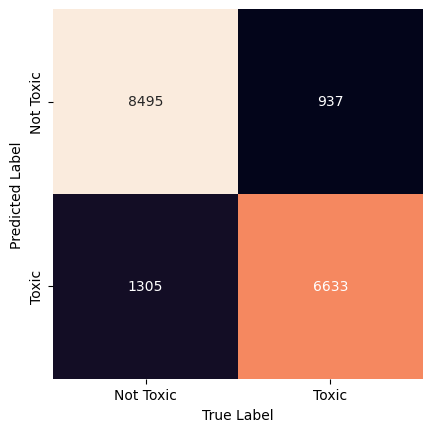

In [61]:
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [62]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      9800
           1       0.84      0.88      0.86      7570

    accuracy                           0.87     17370
   macro avg       0.87      0.87      0.87     17370
weighted avg       0.87      0.87      0.87     17370



In [63]:
# Show the predicted probabilities for the X_test_dtm.

y_pred_prob = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([9.92447441e-01, 9.99998845e-01, 1.00000000e+00, ...,
       9.12832316e-01, 2.77420961e-11, 6.68523605e-03])

In [64]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.

test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob': y_pred_prob})

# Reset the index.
test_results_df.reset_index(drop=True, inplace=True)

test_results_df

,text,actual,predicted,prob
0,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,9.924474e-01
1,A lot of you niggas turned these bitches into ...,1,1,9.999988e-01
2,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,1.000000e+00
3,our playground for the morning. big bear tri ...,0,0,6.038000e-02
4,"""@ellisluciano: Binay as President #ShortHorro...",1,0,2.903163e-01
...,...,...,...,...
17365,Mad respect to Affleck for refusing to wear a ...,0,0,4.692311e-02
17366,RT @TAXSTONE: If YA bitch ex is a nigga u thin...,1,1,1.000000e+00
17367,@imcessfederico trillion yan ! Wala eh... Only...,0,1,9.128323e-01
17368,fathersdaymessage #fathers #day #message buy...,0,0,2.774210e-11


# 5 | Some Results Showcase

In [65]:
# Show the correctly classified text.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['prob'] > 0.42)].sort_values(by='prob', ascending=False)

,text,actual,predicted,prob
6750,RT @TreLeKidd: Yo bitch is Gucci Mane RT @Jaba...,1,1,1.000000
9590,If a nigga in nap can fuck my bitch that mean ...,1,1,1.000000
13715,"Know that karma's TOO REAL, hope you doin' coo...",1,1,1.000000
5822,"Oh well, you lil stupid ass bitch I don't fuck...",1,1,1.000000
9547,"""@k_eazy26: Facts what baldheaded bitch made t...",1,1,1.000000
...,...,...,...,...
12826,Feel nako si Binay ang Big winner #PBBTheBigNight,0,0,0.422095
11524,@sippey That's where birds came from.,0,0,0.421793
10322,wish I had a brownie or a dab to knock me out rn,0,0,0.421353
10736,Anglo-Saxon Mike Oz,0,0,0.421353


In [66]:
# Show the misclassified text.

test_results_df[(test_results_df['actual'] != test_results_df['predicted']) & (test_results_df['prob'] > 0.1)]

,text,actual,predicted,prob
4,"""@ellisluciano: Binay as President #ShortHorro...",1,0,0.290316
31,Anyone want to share their thoughts on their m...,1,0,0.327778
35,"Nakakabeast mode naman. Di ka pa nga botante, ...",1,0,0.360778
45,joshwin is always like this! ðð what's w...,0,1,0.716212
55,25 jan. interested in how #discrimination and ...,1,0,0.155160
...,...,...,...,...
17297,Scary costume ideas: A President Binay costume.,1,0,0.111132
17300,these hoes don't gaf about you or your life......,0,1,0.999919
17319,The administration has to be very cognizant of...,0,1,0.660164
17339,RT @Elisaa_Martinez: Happy birthday cotton pic...,0,1,0.998463


In [67]:
# Show some toxic text that were correctly classified.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['prob'] > 0.69)].sort_values(by='prob').head(10)


,text,actual,predicted,prob
2053,Putangina nyo beastmode ako ngayon kaya nag-on...,1,1,0.691690
16178,kinda believing this doe.,1,1,0.691849
3681,@NatlFascist88 @waspnse Jews and white race tr...,1,1,0.692546
11391,islam against racism,1,1,0.693016
15019,When you someone who's voting for Binay... *barf*,1,1,0.693333
1620,"""Bat kase di ka makatulog?"" ""No.1 kase si Bina...",1,1,0.693856
4341,can sniff out subtle &amp; the ignorant in a ...,1,1,0.694843
15084,@yobritttany wagon burner! Jk jk you did look ...,1,1,0.696169
9092,Trillanes: Kaya may programa si Binay para sa ...,1,1,0.697392
10428,#NoToDuterte #NoToCorruption #NoToBinays Qho ...,1,1,0.698123


In [68]:
#  Show some non-toxic text that were correctly classified.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['prob'] > 0.3) & (test_results_df['actual'] == 0)].sort_values(by='prob').head(10)


,text,actual,predicted,prob
17288,@bocgeogaddi @anepicname lmaooooo epic bird wins.,0,0,0.300941
9323,Mar Roxas for the win!! https://t.co/KqIFPzJakS,0,0,0.302305
5994,Fairy tale world lmao,0,0,0.302370
14167,Pero please if not Duterte; please Santiago or...,0,0,0.302517
12846,Hasn't conceded,0,0,0.303257
5785,#Poe2016,0,0,0.303257
7814,I would be disappointed if mar roxas will be t...,0,0,0.303299
15025,JOSHANELT FOR BLOODYCRAYONS https://t.co/F6Dtl...,0,0,0.303495
11406,when is this gonna happen to me ð© #aladdin ...,0,0,0.304052
7621,random running dogs in the ghetto,0,0,0.304490


In [69]:
# Show the correctly classified text with probability range [0.9, 1.0).

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['prob'] >= 0.9) & (test_results_df['prob'] < 1.0)]

,text,actual,predicted,prob
0,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,0.992447
1,A lot of you niggas turned these bitches into ...,1,1,0.999999
2,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,1.000000
5,#nazi #swastika #ebay! #trump #donaldtrump #re...,1,1,0.941161
6,Sobrang ganda nung palabas tapos bglang sising...,1,1,0.999974
...,...,...,...,...
17358,Binay's appeal-to-pity-commercial makes me lau...,1,1,0.995591
17362,This fat bitch got all huffy cause she took to...,1,1,1.000000
17363,@ZwengerSierra how about you @ me bitch,1,1,0.993077
17364,RT @ImNeverChillin: Niggas drop outta high sch...,1,1,1.000000


# Using Other AI Model

In [70]:
df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
69475,when baylor wins im talking so much trash,0
69476,who's downie like a brownie 4 brunch? Need mim...,0
69477,yea so about @N_tel 's new friend.. all my fri...,0
69478,"you know what they say, the early bird gets th...",0


In [96]:
# Using the entire dataset, vectorize the data.

X = df['text']
y = df['label']

cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 2), max_df=0.2, min_df=2,
                        lowercase=False, binary=True)
X_dtm = cvect.fit_transform(X)


In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
clusters = kmeans.fit_predict(X_dtm)
kmeans.cluster_centers_.shape

(2, 93912)

In [98]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

C:\Users\floss\AppData\Local\Temp\ipykernel_23384\3418990327.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


In [99]:
accuracy_score(y, labels)

0.5625791594703512

Text(113.9222222222222, 0.5, 'Predicted label')

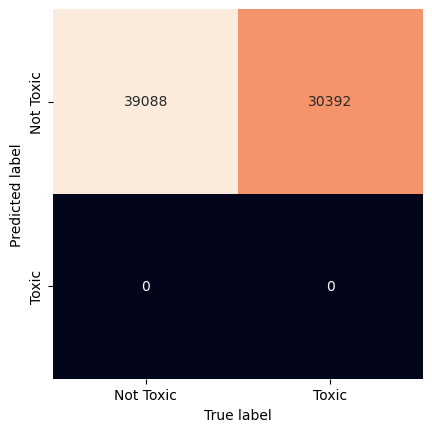

In [101]:
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [76]:
from sklearn.manifold import TSNE

# Using t-SNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=42)
projection = tsne.fit_transform(X_dtm)

# Compute the clusters
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
cluster = kmeans.fit_predict(projection)

# Permute the labels
labels = np.zeros_like(cluster)
for i in range(2):
    mask = (cluster == i)
    labels[mask] = mode(y[mask])[0]

# Compute the accuracy
accuracy_score(y, labels)

C:\Users\floss\AppData\Local\Temp\ipykernel_23384\194821262.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


0.7230713874496258

In [105]:
# Permute the labels
labels = np.zeros_like(cluster)
for i in range(2):
    mask = (cluster == i)
    labels[mask] = mode(y[mask])[0]

C:\Users\floss\AppData\Local\Temp\ipykernel_23384\1004676079.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


In [106]:
accuracy_score(y, labels)

0.7230713874496258

Text(113.9222222222222, 0.5, 'Predicted label')

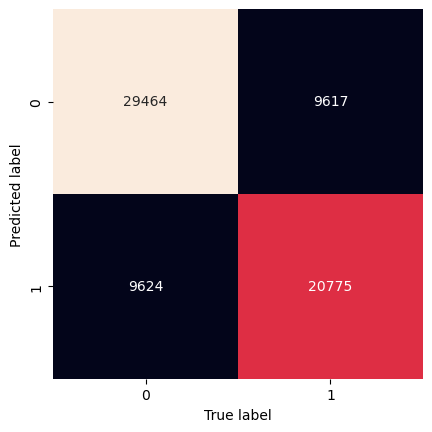

In [107]:
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [109]:
kmeans = []
accuracy_scores = []
inertias = []

for i in range(1, 6):
    # Project the data: this step will take several seconds
    temp_tsne = TSNE(n_components=2, init='random', random_state=69)
    temp_projection = temp_tsne.fit_transform(X_dtm)

    # Compute the clusters
    temp_kmeans = KMeans(n_clusters=i, random_state=69)
    temp_clusters = temp_kmeans.fit_predict(temp_projection)
    kmeans.append(temp_kmeans)

    # Permute the labels
    temp_labels = np.zeros_like(temp_clusters)
    for j in range(2):
        mask = (temp_clusters == j)
        temp_labels[mask] = mode(y[mask])[0]

    # Compute the accuracy
    temp_accuracy_score = accuracy_score(y, temp_labels)
    accuracy_scores.append(temp_accuracy_score)

    # Get the inertia
    temp_inertia = temp_kmeans.inertia_
    inertias.append(temp_inertia)


c:\Users\floss\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\floss\AppData\Local\Temp\ipykernel_23384\2294460914.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  temp_labels[mask] = mode(y[mask])[0]
c:\Users\floss\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\

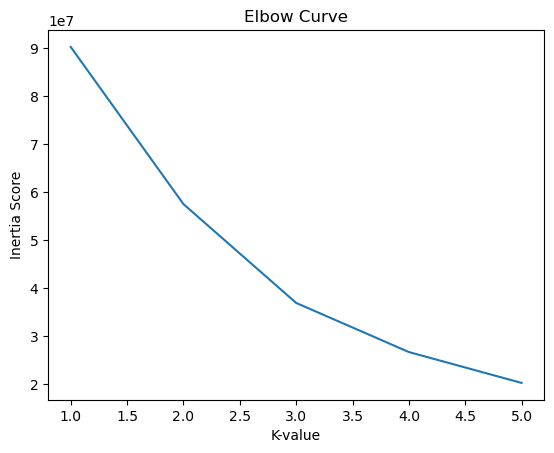

In [242]:
plt.plot(range(1, 6), inertias)
plt.xlabel('K-value')
plt.ylabel('Inertia Score')
plt.title('Elbow Curve')
plt.show()

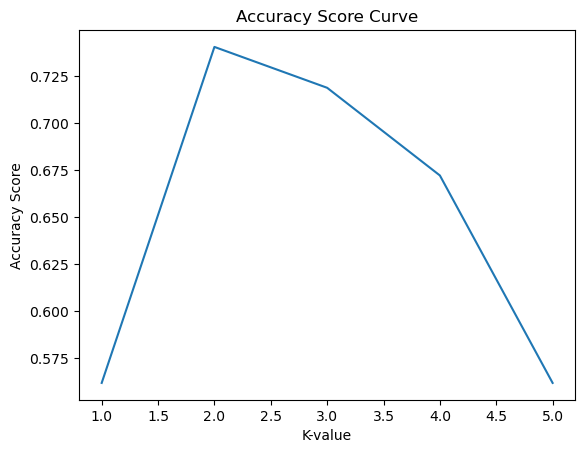

In [244]:
plt.plot(range(1, 6), accuracy_scores)
plt.xlabel('K-value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Curve')
plt.show()